This is a function I wrote to plan follow-up transit observations for TKS planets. I have it in this folder because it's 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import EarthLocation, get_sun, SkyCoord, ICRS, AltAz

def Observability_Plotter(ra, dec, midpoint,observatory,period,
                          transit_duration,start_days,end_days,objname,bjd_offset=2457000):
    '''
    This function generates a bunch of observability plots for transiting planets.
    The output plots show the transit itself in yellow and the rest of the star's
    visibility in purple (or so it was when I wrote it; ymmv for the matplotlib 
    defaults).
    
    Inputs:
    midpoint- transit midpoint. The default here is for TESS (BJD-2457000, so 
        if you're using some other midpoint data, make sure that you've got the
        correct offset!
    observatory- where are you? currently only supports observatories that astropy
        already knows about with its EarthLocation.of_site method
    transit duration- how long the transit is, in hours
    start days- how many days (from the given transit midpoint date) do you want the data 
        to start? (below, as written, it's 565. I think.)
    end_days- how many days from the given midpoint do you want the data to end? 
        note: this "start and end days" thing is sketchy, but the program prints the actual
        date above your plots, so some trial and error should get you what you want
    bjd_offset- the offset of your midpoint, in days, 
    '''
    
#NOTE TO SELF: EVERYtHING BELOW HERE HAS JUST BEEN TABBED, AND IS *NOT* I REPEAT *NOT*
#IN FUNCTIONAL FORM! DON'T TRY TO USE IT LIKE THAT UNTIL YOU FIX IT!
    
    transit_bjd = midpoint + bjd_offset
    d = transit_bjd #Transit Epoch, from TEV data
    times_jd = []
    while d < transit_bjd + end_days:
        times_jd.append(d)
        d += period
        
    #select times which are in the second half of the year (i.e. in our NIRSPEC proposal window)
    times = np.array(times_jd)
    times = times[times>transit_bjd + start_days]
    t = Time(times, format='jd')
    
    #put a bunch of dates in UTC, NOT hawaii standard
    #transit_dates_hst = []
    #for time in t.iso:
    #    transit_dates_hst.append(Time(time)-(10*u.hour))
    dates_utc = Time(t.iso)
        
    #get the location info for the planet and observatory
    r, de = (ra, dec) #directly from the data above
    toi509 = SkyCoord(ICRS(ra=r*u.deg,dec=de*u.deg))
    keck = EarthLocation.of_site(observatory)
    
    #generate the target's sky position 
    dt = transit_duration #transit duration
    tovals = np.linspace(-12, 12, 1000)
    time_offsets = tovals*u.hour
    
    #make function to output color based on whether it's in transit or not
    def ColorGetter(time):
        return np.logical_and(time>(-dt/2), time<(dt/2))
    
    #switching frames
    i=0
    for date in dates_utc:
        altazframe = AltAz(obstime=date+time_offsets, location=keck)
        sunaltazs = get_sun(date+time_offsets).transform_to(altazframe)
        toi509altaz = toi509.transform_to(altazframe)
        
        #plot for real
        plt.figure(i)
        plt.title(objname + " : " + str(date) + ", UTC")
        #plt.plot(time_offsets, sunaltazs.alt, color='y', label='Sun')
        plt.scatter(time_offsets, toi509altaz.alt, c=ColorGetter(tovals), label='TOI 509.01')
        plt.fill_between(time_offsets, 0, 90, sunaltazs.alt < -0*u.deg, color='0.5', zorder=0)  
        plt.fill_between(time_offsets, 0, 90, sunaltazs.alt < -18*u.deg, color='k', zorder=0)  
        plt.ylim(0,90);plt.xlim(-12,12);
        plt.ylabel('Altitude (Degrees)');plt.xlabel('Time Outside of Transit Midpoint (Hours)')
        i+=1

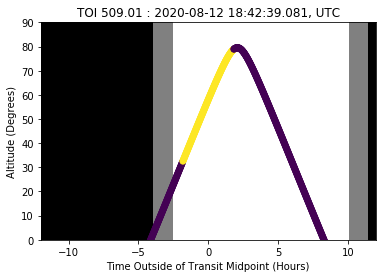

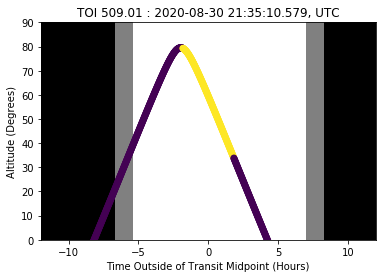

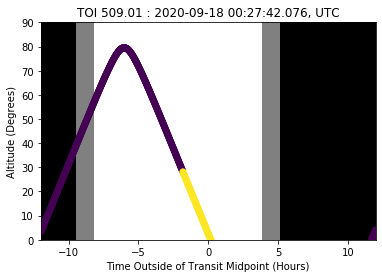

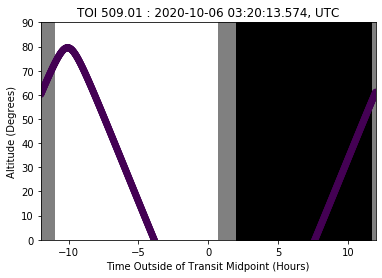

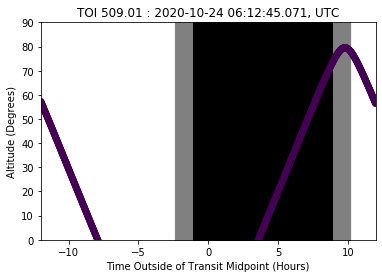

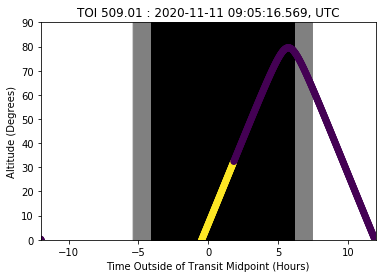

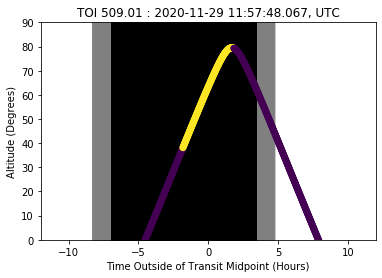

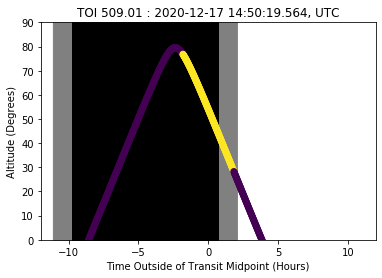

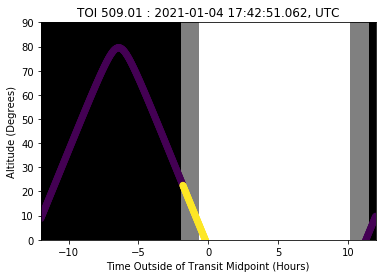

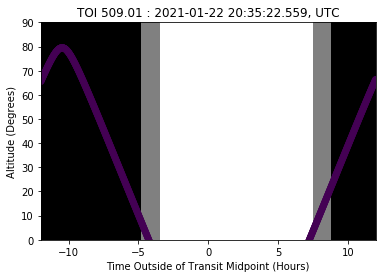

In [5]:
#TOI 509.01
Observability_Plotter(ra=117.924642, dec=9.385241, midpoint=1494.445731, 
                     observatory='Keck Observatory', period=18.119809, transit_duration=3.669772, 
                     start_days=565,end_days=750, objname='TOI 509.01')

/home/nicholas/science/atmos-env/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


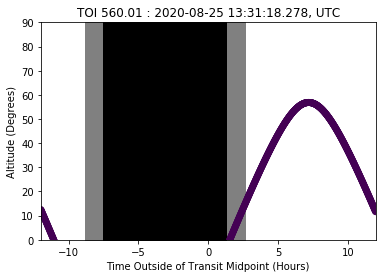

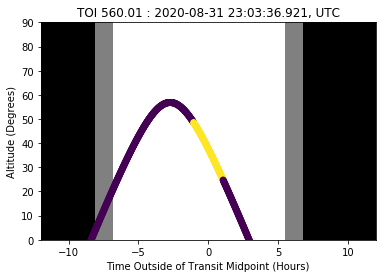

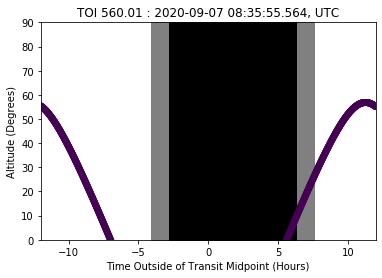

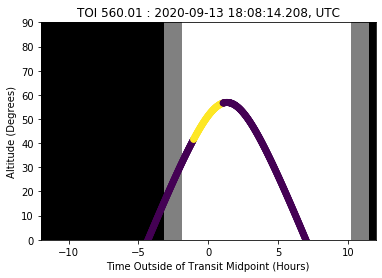

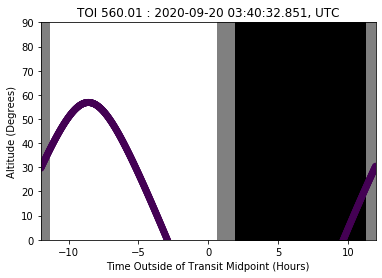

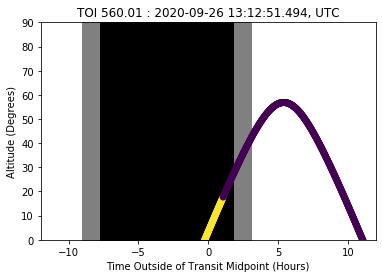

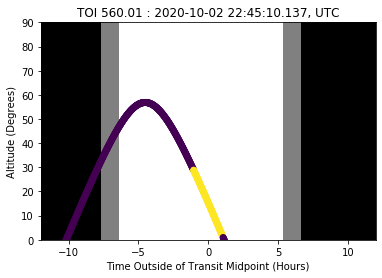

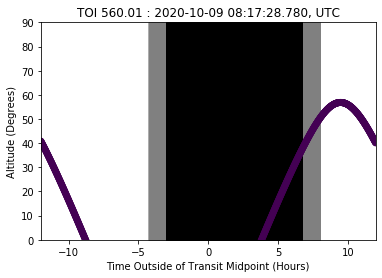

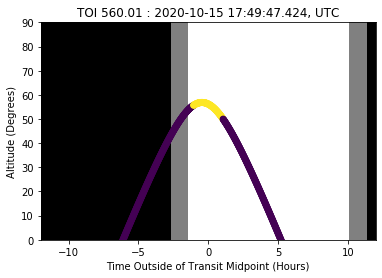

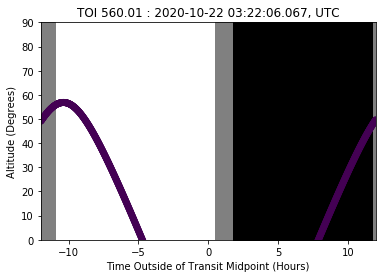

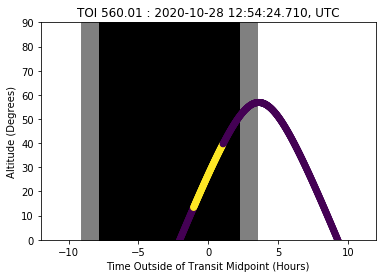

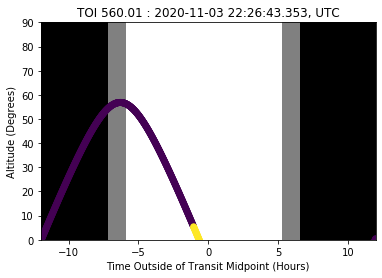

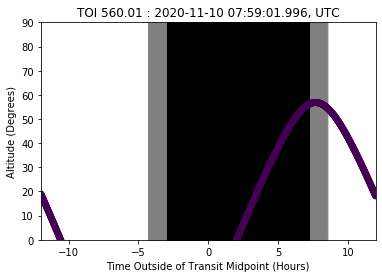

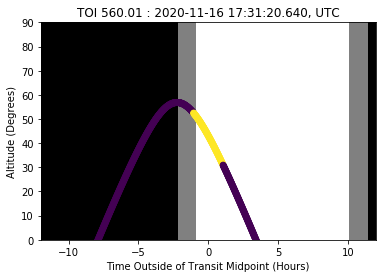

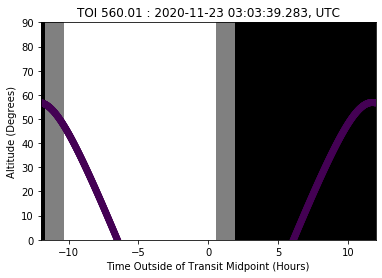

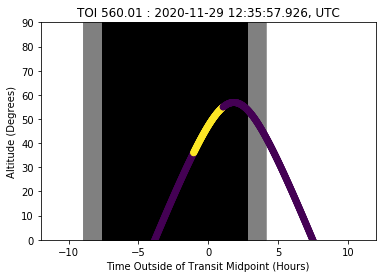

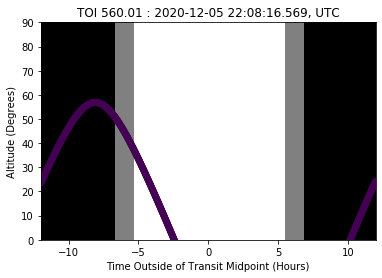

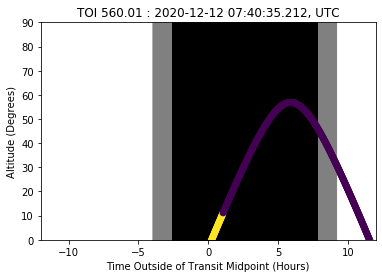

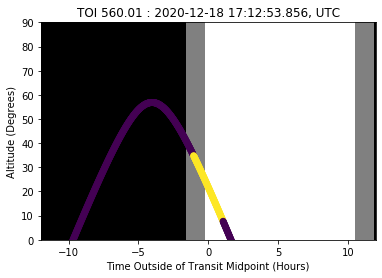

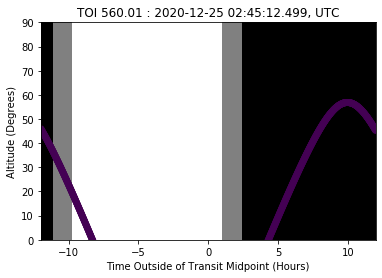

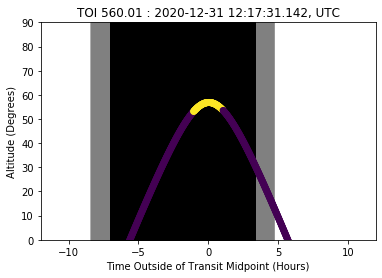

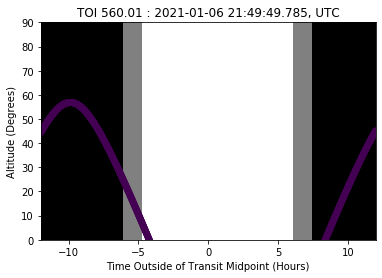

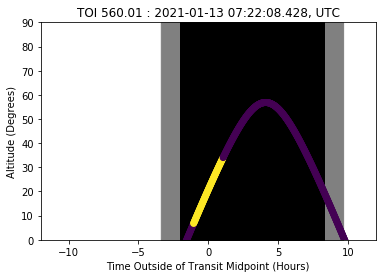

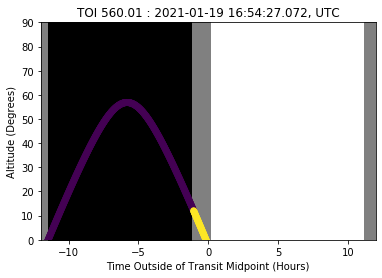

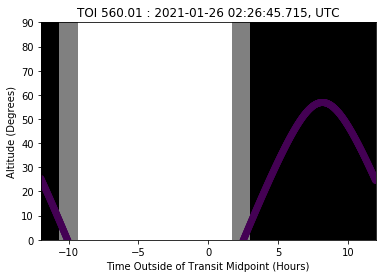

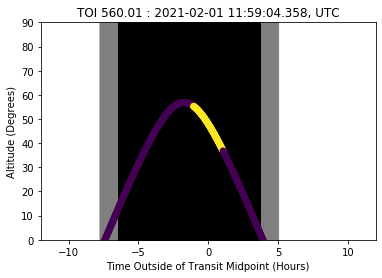

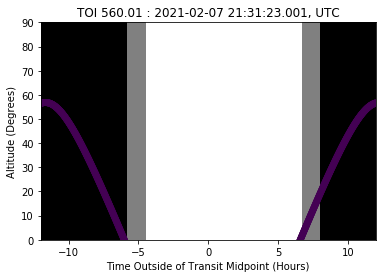

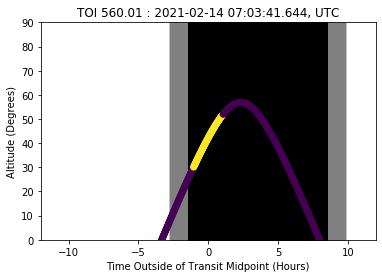

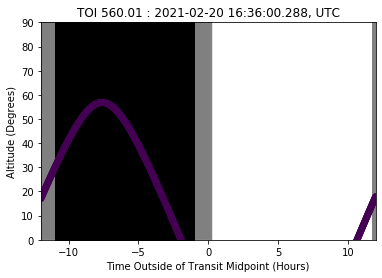

In [7]:
#TOI 560.01
Observability_Plotter(ra=129.688588, dec=-13.256682, midpoint=1517.691424, 
                     observatory='Keck Observatory', period=6.397438, transit_duration=2.119473, 
                     start_days=565,end_days=750, objname='TOI 560.01')